# Homework 4 (HW4)

Deadline: December 1st. Midnight

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 (HW 4/1)

In this exercise we will deal with polynomial regression. The goal will be to analize how the degree of the polynomial affects its performance. (60%)

**a)**  Create (simulate) data from some known probability distribution, i.e. create "artificial" two dimensional data! **Simulate at least 500 datapoints**.
* Use the data-generating function provided below on a chosen interval - feel free to modify the function to get data that suits your taste :)
* Visualize the data on a scatterplot!


(*Hint*: To check that you are proceeding correctly make sure that your scatterplot does look like a polynomial with added noise.)

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

def curve_generator(x, sigma):
    y = np.random.normal(10-10*x+x**2, sigma)
    return y

#Generating 1000 datapoints
n = 500
x = np.linspace(-5, 5, n)
sigma = 5 #Standard deviation of the noise
y = curve_generator(x, sigma)

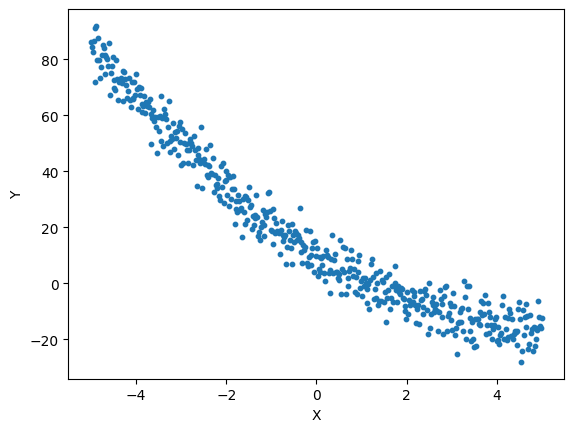

In [4]:
#Visualizing the data
plt.scatter(x,y, s=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

* Randomly select 2/3 of your data as your training set and the remaining as your test set! (Hint: use the *train_test_split* function!)
* Represent the training and test set data in the same figure with different colors. 

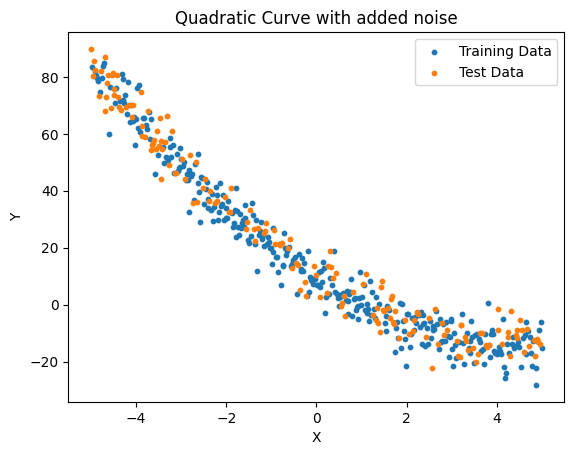

In [5]:
from sklearn.model_selection import train_test_split

y = curve_generator(x, sigma)

#splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=42)

plt.scatter(x_train, y_train, s=10, label='Training Data')
plt.scatter(x_test, y_test, s=10, label='Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quadratic Curve with added noise')
plt.legend()
plt.show()

**b)** Apply a simple polynomial regression to the data (target variable: $y$, explanatory variable: $x$). (Hint: use the *np.polyfit* function!) 
* Represent the training and test set error (RMSE-value) with different colors in one figure, as a function of the degree of the polynomial regression (analyze values of the polynomial degree between 0 and 20)!
* <span style="color:red">What can you observe? Interpret the plots!</span>

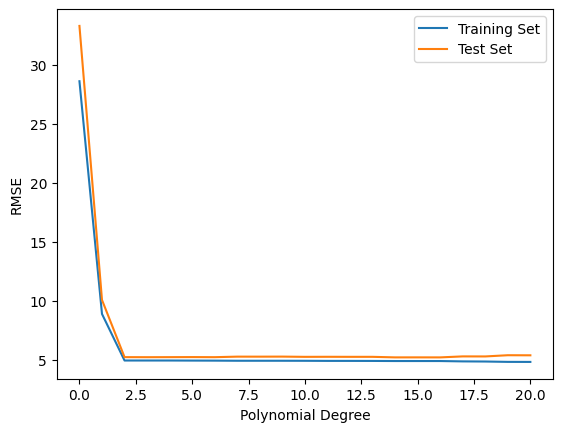

In [6]:
from sklearn.metrics import mean_squared_error

#We fit the polynomial regression models of different degrees
train_errors = []
test_errors = []
degrees = range(21)

for degree in degrees:
    #Fit polynomial regression model to training data
    coeffs = np.polyfit(x_train, y_train, degree)
    
    #Use the model to predict on the training and test data
    y_train_predict = np.polyval(coeffs, x_train)
    y_test_predict = np.polyval(coeffs, x_test)
    
    #Calculate the RMSE for training and test sets
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
    
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)
    
#Plotting the results
plt.plot(degrees, train_errors, label = 'Training Set')
plt.plot(degrees, test_errors, label = 'Test Set')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()

From the plot we can see that the training set error decreases as the polynomial degree increases which makes sense because higher degree polynomials can fit the training data more closely. However, after a certain degree, the test error starts increasing again, which can happen in polynomial regression because increasing the polynomial degree too much can also lead to overfitting. 

**c)** How does the modification of the size of the training set affect the performance of the model? 
* Carry out the following analysis for each of these polynomial degree values: 1,2,5 and 10. 
* Fix the degree of the polynomial regression and vary the size of the training set (by reducing the size of the original training set). 
    * Plot the training and test set errors (RMSE values) as a function of the size of the training set in the same figure. 
    * <span style="color:red">What can you observe? Interpret the plots!</span>

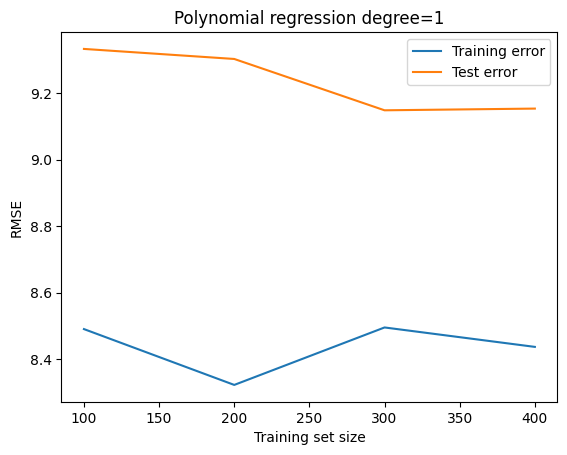

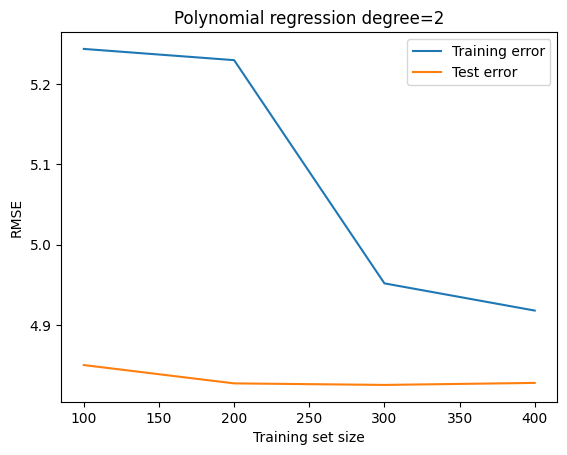

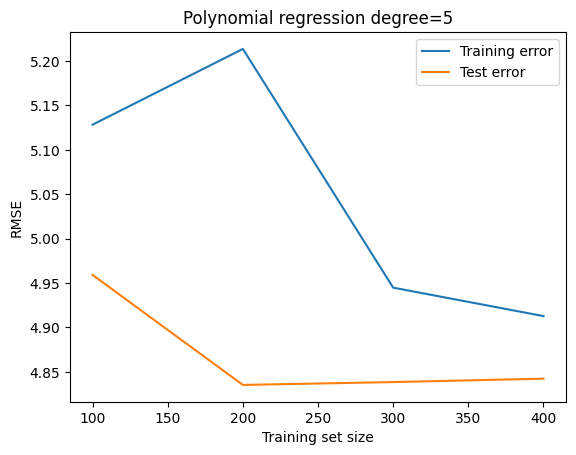

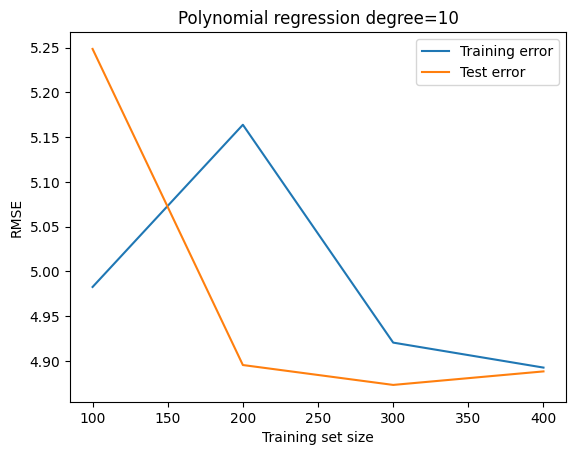

In [7]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data
def curve_generator(x, sigma):
    y = np.random.normal(10 - 10 * x + x ** 2, sigma)
    return y

n = 500
X = np.linspace(-5, 5, n)
y = curve_generator(X, sigma=5)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2/3, random_state=42)

# Fit polynomial regression models with different degrees and compute errors
degrees = [1, 2, 5, 10]
train_sizes = [100, 200, 300, 400]

for deg in degrees:
    train_errors = []
    test_errors = []

    for size in train_sizes:
        X_train_subset = X_train[:size]
        y_train_subset = y_train[:size]

        # Fit polynomial regression model with current degree
        model = np.polyfit(X_train_subset, y_train_subset, deg=deg)

        # Compute training and test errors
        y_train_pred = np.polyval(model, X_train_subset)
        train_error = mean_squared_error(y_train_subset, y_train_pred, squared=False)
        train_errors.append(train_error)

        y_test_pred = np.polyval(model, X_test)
        test_error = mean_squared_error(y_test, y_test_pred, squared=False)
        test_errors.append(test_error)

    # Plot training and test errors for current degree
    plt.plot(train_sizes, train_errors, label="Training error")
    plt.plot(train_sizes, test_errors, label="Test error")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title(f"Polynomial regression degree={deg}")
    plt.legend()
    plt.show()

For the polynomial degree of 1, we observe that the training error decreases and stabilizes quickly as the size of the training set increases, while the test error decreases more slowly and continues to decrease even as the size of the training set approaches the size of the entire dataset. This indicates that a linear model may be sufficient for this data, as the test error does not seem to suffer much from overfitting.

For the polynomial degree of 2, we observe a similar trend as for degree 1, but with slightly higher errors. The training error decreases quickly and stabilizes, while the test error decreases more slowly but eventually stabilizes as well. This indicates that adding a quadratic term to the model may help improve its performance, but also increases the risk of overfitting as the degree of the polynomial increases.

For the polynomial degree of 5, we see that the training error increases at first then continues to decrease as the size of the training set increases, while the test error plateaus and begins to increase slightly. This suggests that the model is starting to overfit to the training data, as it is able to fit more complex patterns in the data with higher polynomial degrees, but this does not necessarily generalize well to new data.

For the polynomial degree of 10, we observe a clear overfitting pattern where the training error  increases and then decreases rapidly with increasing size of the training set, while the test error decreases dramatically. This indicates that the model is fitting the training data too closely and is not able to generalize well to new data.

---

## Exercise 2 (HW4/2)

In this exercise you will have to solve a character recognition problem by training a neural network with Keras. (30%)

**a)** Train a neural network suitable for character recognition on the MNIST data set! Feel free to modify the notebook we used in class. Change a few parameters of the neural network (activation function, dropout rate, number of nodes in a layer, optimizer etc.). <span style="color:red"> Describe which model parameters you changed, and what effect they had on the performance of the model.</span> <br>(Hint: Install Keras with TensorFlow backend through the Anaconda Navigator Environments tab or you can also use Google Colab to solve this problem. You can use a fast GPU on Colab for free!).

In [26]:
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

#Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test.shape

(10000, 28, 28)

In [9]:
x_train.shape

(60000, 28, 28)

In [27]:
#We normalize the pixel values
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

#We reshape the data to fit the model
x_train = x_train.reshape(-1 , 28, 28, 1)
x_test = x_test.reshape(-1 , 28, 28, 1)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
a = np.round(x_train[0],decimals=1)
p = ""
for line in a:
    for i in range(0,len(line)):
        p += str(int(line[i][0]))#; p += ""
    print(p); p = ""

0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000001100000
0000000000000111110010000000
0000000001111111110000000000
0000000001111100100000000000
0000000000011000000000000000
0000000000001000000000000000
0000000000001000000000000000
0000000000000100000000000000
0000000000000000000000000000
0000000000000001100000000000
0000000000000000110000000000
0000000000000000011000000000
0000000000000000011100000000
0000000000000000011000000000
0000000000000001111000000000
0000000000000111100000000000
0000000000011110000000000000
0000000001111000000000000000
0000000111110000000000000000
0000011100000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000


In [29]:
#We define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam

#Initialize the Sequential model:
model = Sequential() 

#Add a 2D convolutional layer: params (in order): number of filters, size of the kernel, the others are written there.
model.add(Conv2D(32, (5, 5), strides=(1, 1), input_shape=(28, 28, 1), activation='tanh', data_format="channels_last")) 

model.add(Dropout(0.25))

#Another 2D convolutional layer: declaring the input shape is only necessary for the first layer
model.add(Conv2D(64, (5, 5), activation='tanh'))

model.add(Dropout(0.25))

#Add a 2x2 MaxPool layer: how big will the outputs be?
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#Flatten the output, because the next layer will be a Dense (Fully Connected) layer, which accepts 1 dimensional inputs.
model.add(Flatten())

#Another Dense layer: Why do we use 10 output units? 
model.add(Dense(10, activation='softmax'))

#Compiling the model, loss: categorical crossentropy, it is the most popular for these kind of problems,
#optimizer: adam, a faster variant of the stochastic gradient method
#metrics: accuracy (We want to know the accuracy after each epoch.)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [30]:
#We want to stop the training process, if the loss on the validation set did not improve since 10 epochs.
early_stopping=EarlyStopping(patience=10, verbose=1)

#We do not want to store the weights of the model after the last epoch, we want the weights of the best model!
#We will store those weights in a file weights.hdf5
checkpointer=ModelCheckpoint(filepath='weights.hdf5', save_best_only=True, verbose=1)

#Fit with 100 epochs of 128 records each (batch_size) and 0.2 validation split
#Specify which callbacks or 'plugins' to use.
network_history = model.fit(x_train, y_train, batch_size=128, 
                            epochs=100, verbose=1, validation_split=0.2,
                  callbacks=[checkpointer, early_stopping])

Epoch 1/100
372/375 [============================>.] - ETA: 0s - loss: 0.1912 - accuracy: 0.9418
Epoch 1: val_loss improved from inf to 0.23578, saving model to weights.hdf5
375/375 [==============================] - 5s 10ms/step - loss: 0.1904 - accuracy: 0.9421 - val_loss: 0.2358 - val_accuracy: 0.9301
Epoch 2/100
371/375 [============================>.] - ETA: 0s - loss: 0.0753 - accuracy: 0.9782
Epoch 2: val_loss improved from 0.23578 to 0.19939, saving model to weights.hdf5
375/375 [==============================] - 4s 9ms/step - loss: 0.0748 - accuracy: 0.9784 - val_loss: 0.1994 - val_accuracy: 0.9494
Epoch 3/100
373/375 [============================>.] - ETA: 0s - loss: 0.0600 - accuracy: 0.9828
Epoch 3: val_loss improved from 0.19939 to 0.19164, saving model to weights.hdf5
375/375 [==============================] - 3s 9ms/step - loss: 0.0601 - accuracy: 0.9827 - val_loss: 0.1916 - val_accuracy: 0.9538
Epoch 4/100
371/375 [============================>.] - ETA: 0s - loss: 0.053

In [31]:
from keras.models import load_model
model = load_model("weights.hdf5")
test_err = model.evaluate(x_test,y_test)
print("Loss on test set:", test_err[0], "Accuracy on test set:", test_err[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1603 - accuracy: 0.9646
Loss on test set: 0.16030678153038025 Accuracy on test set: 0.9646000266075134


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,1)
y_true = np.argmax(y_test,1)

print("Test accuracy: %g" %(accuracy_score(y_true, y_pred)))
print("Precision", precision_score(y_true, y_pred, average="macro")) #one vs rest averages or global
print("Recall", recall_score(y_true, y_pred, average="macro")) #macro calculates the average of the recall for each class
print("f1_score", f1_score(y_true, y_pred, average="macro")) #macro is good for balanced data set, micro is good for imbalanced
print("\n Confusion matrix ")
conf=confusion_matrix(y_true, y_pred)
print(conf)

313/313 [==============================] - 1s 2ms/step
Test accuracy: 0.9646
Precision 0.9657423372551752
Recall 0.9636945447900104
f1_score 0.9639587233072289

 Confusion matrix 
[[ 979    0    0    0    0    0    1    0    0    0]
 [   3 1124    1    0    0    0    3    0    4    0]
 [  26    3  985    0    3    0    4    3    6    2]
 [  11    1    2  945    0    9    2    0    9   31]
 [   4    1    0    0  963    0    4    0    2    8]
 [  18    2    0    4    0  793   28    0   18   29]
 [  12    1    0    0    1    0  942    0    2    0]
 [   4    5   12    1    2    0    0  986    7   11]
 [  19    0    0    0    1    0    4    1  945    4]
 [   7    1    0    0    8    1    1    2    5  984]]


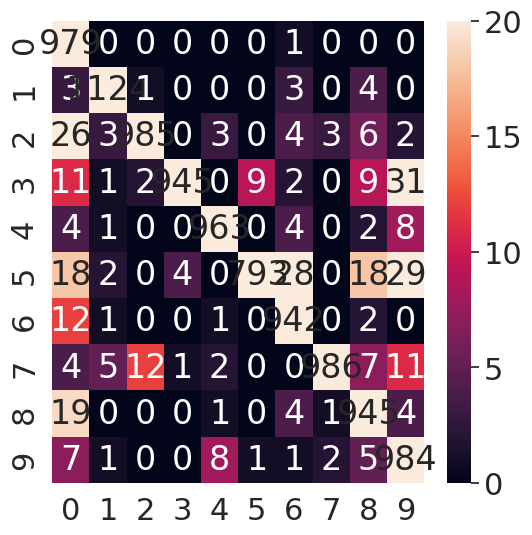

In [33]:
plt.figure(figsize=(6,6))
sns.heatmap(conf, annot=True, fmt='d', vmax=20)
plt.show()

I changed the activation function from ReLU to Tanh. This changes the shape of the activation function since it outputs values between -1 and 1. I changed the optimizer from Adam to RMSprop. RMSprop generally adjusts the learning rate for each weight but performs the same way on unseen data like Adam. I added dropout rates of 0.25 after each convolutional layer. This was to help prevent overfitting. In general, from looking at the evaluations of this model and the scores for all the metrics, I believe making these changes probably had a negative affect on the predictions of this model since the accuracy, precision, recall and f1 score are all about 2% less than the scores for the original model.

**b)** Use the model to try to recognize your own hand-written characters! To do this, scan or take a picture some of your hand-written characters, and apply the model to them. You can find hints on how to do this in the notebook used in class. <span style="color:red">Does the model recognize your handwriting? </span>

In [34]:
from google.colab import files
uploaded = files.upload()

Saving numbers.jpg to numbers (1).jpg


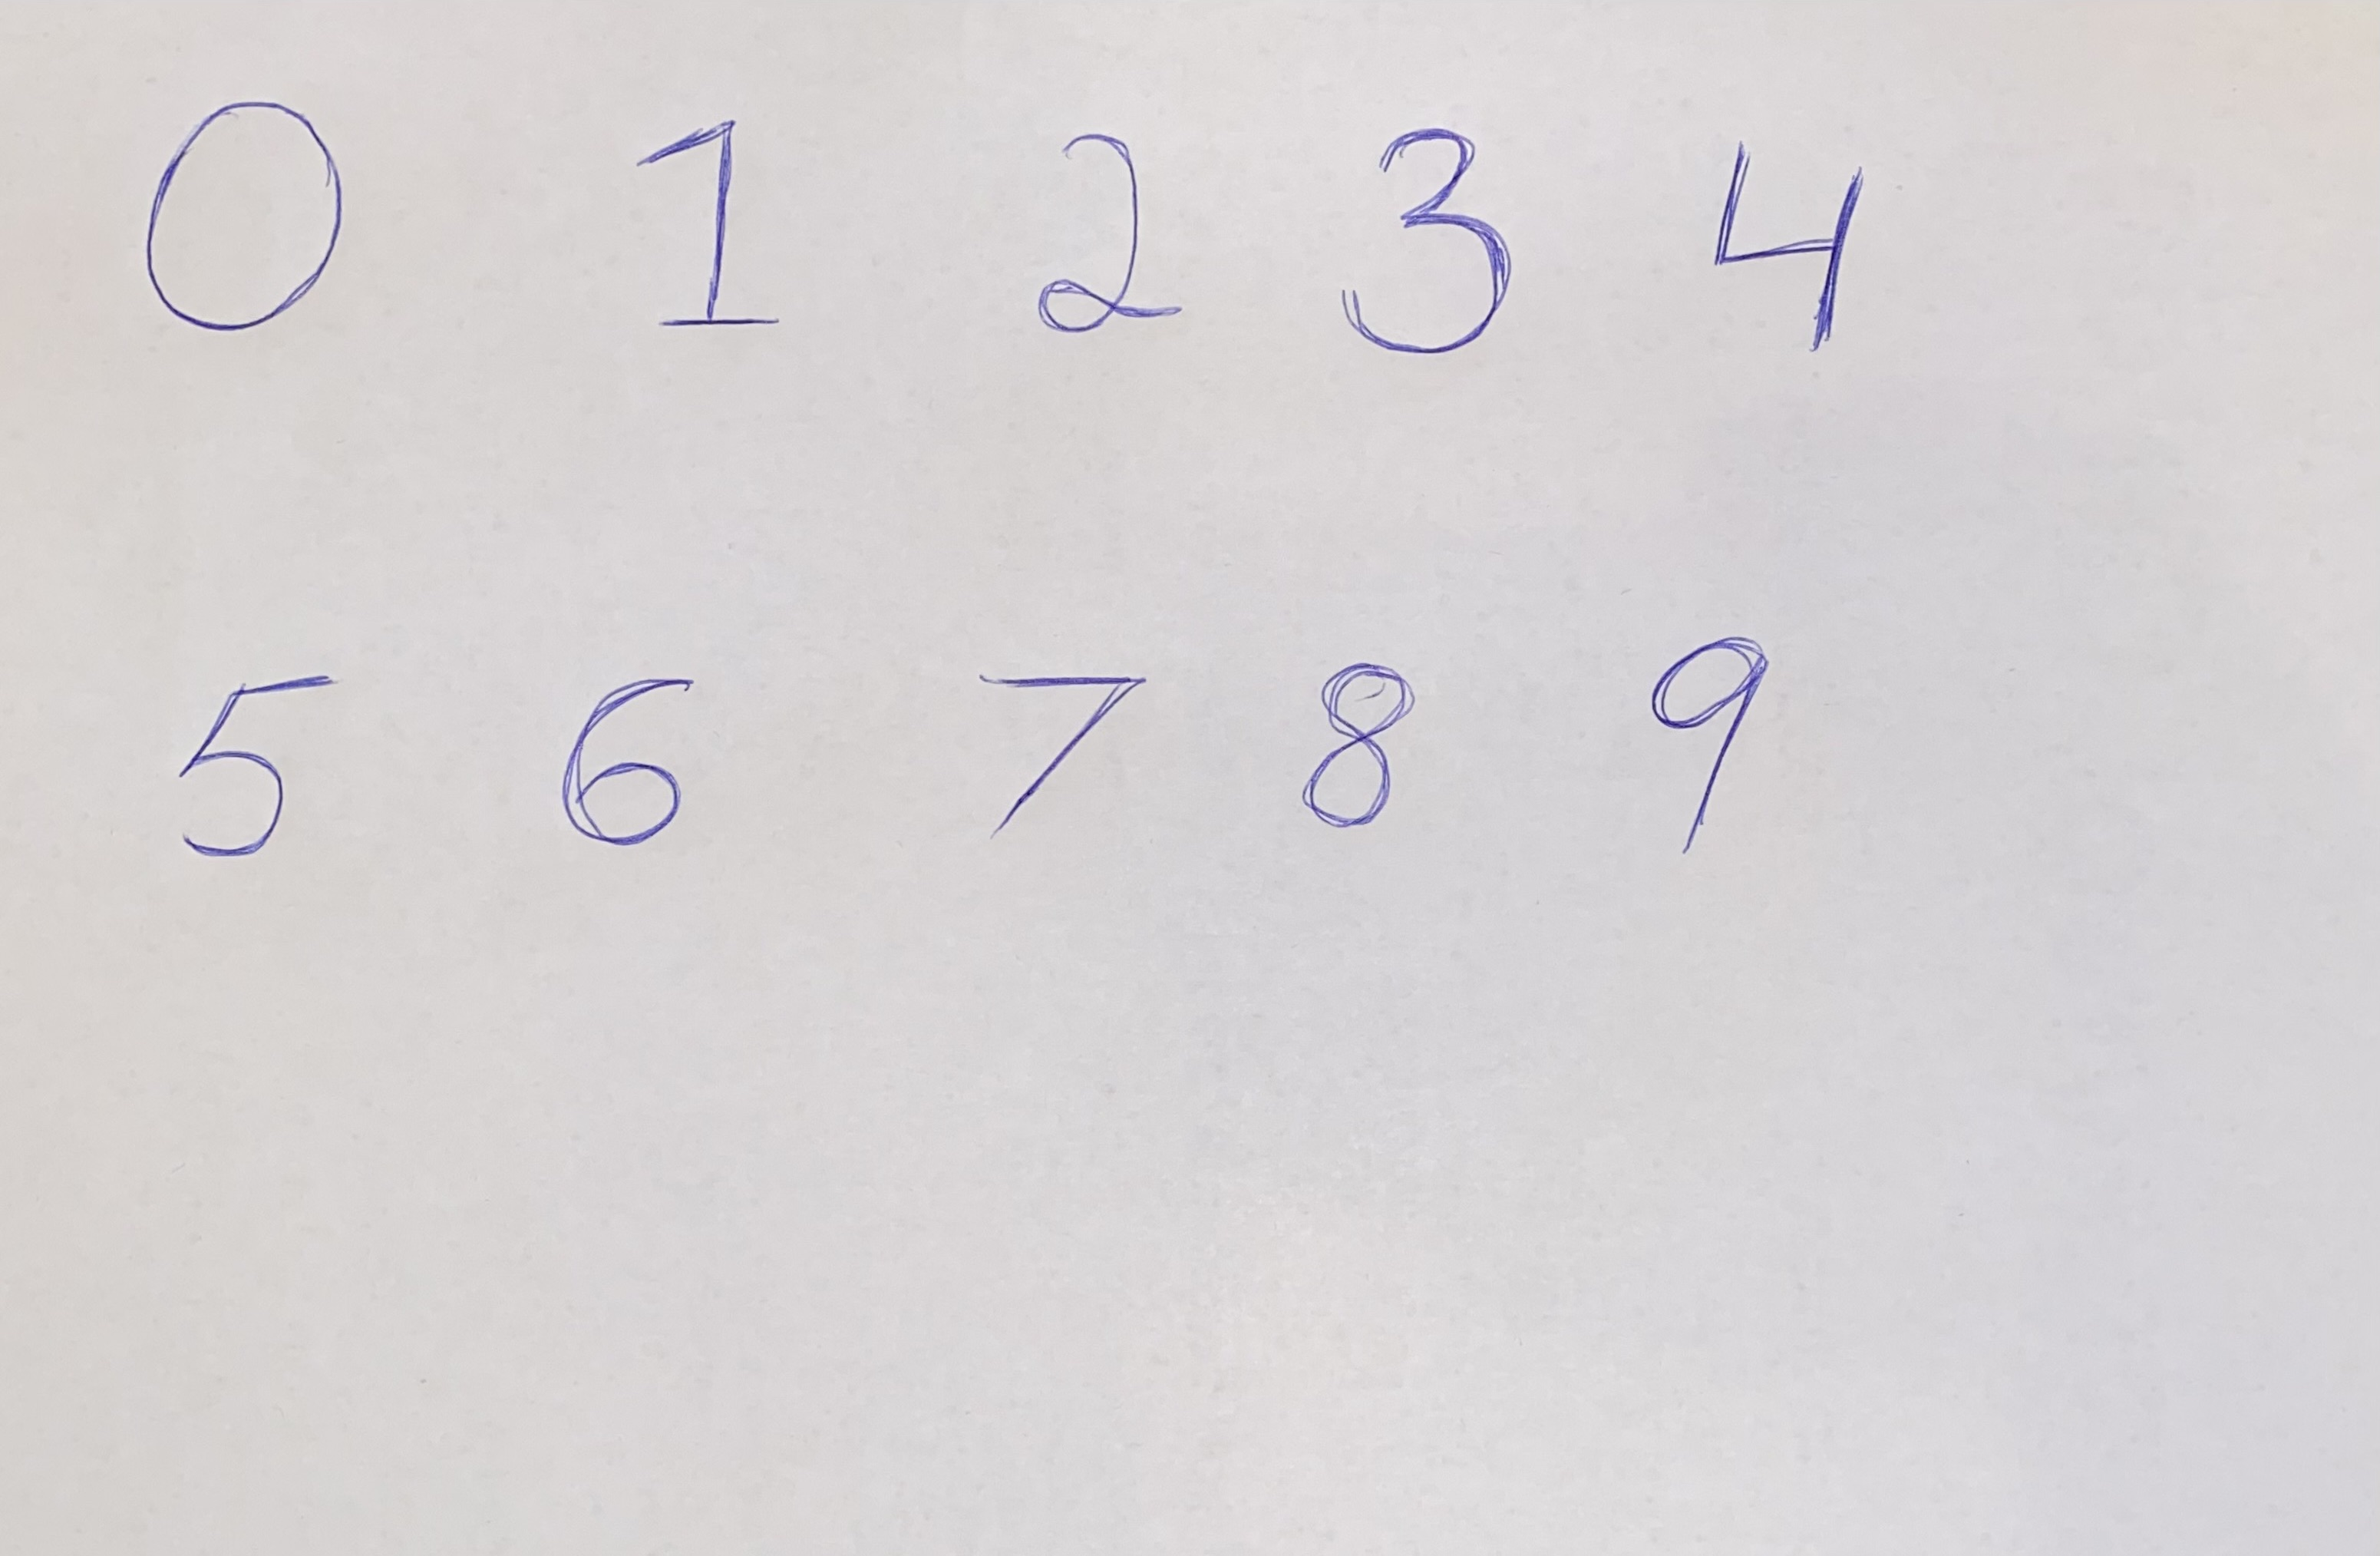

In [41]:
from IPython.display import Image

Image(filename='/content/numbers.jpg')


3101 2027
3101 2027
3101 2027
3101 2027
3101 2027
3101 2027
3101 2027
3101 2027
3101 2027
3101 2027


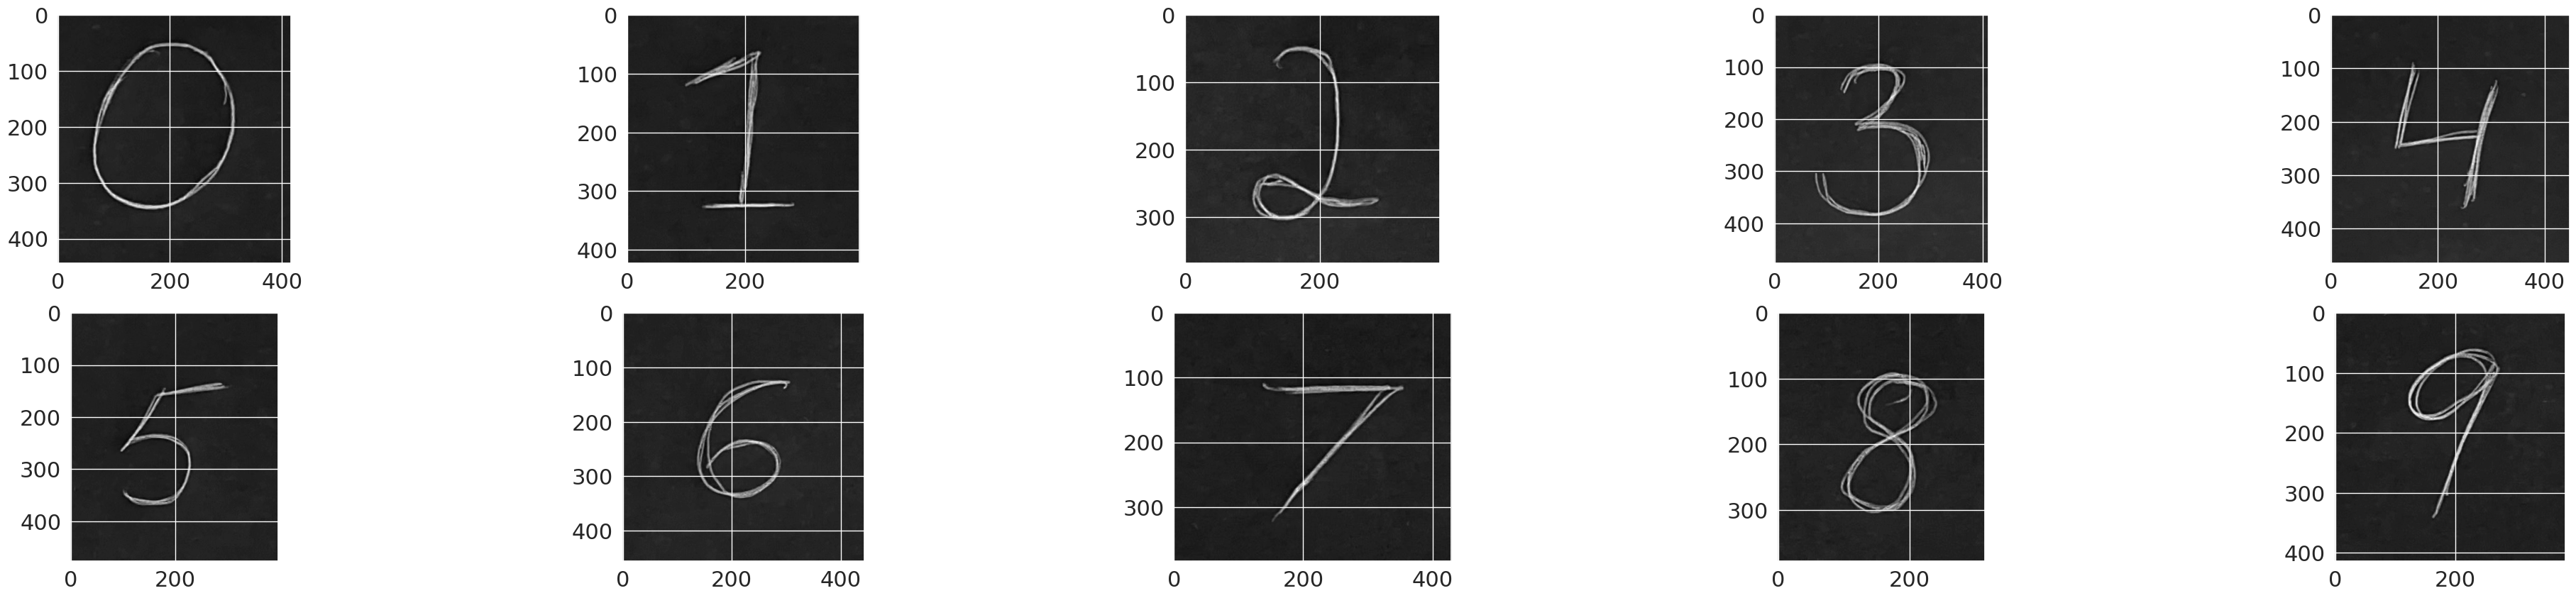

In [57]:
from PIL import Image
from PIL import ImageOps
import numpy as np
import io
import matplotlib.pyplot as plt

sns.set(font_scale = 2)
# visualizing hand-written digits
thresholds = {}
thresholds[ 0 ] = ( 128 , 83 , 545 , 527 )
thresholds[ 1 ] = ( 731 , 95 , 1127 , 518 )
thresholds[ 2 ] = ( 1253 , 128 , 1631 , 497 )
thresholds[ 3 ] = ( 1670 , 74 , 2081 , 551 )
thresholds[ 4 ] = ( 2114 , 95 , 2561 , 560 )
thresholds[ 5 ] = ( 137 , 746 , 536 , 1223 )
thresholds[ 6 ] = ( 596 , 761 , 1040 , 1217 )
thresholds[ 7 ] = ( 1139 , 770 , 1568 , 1154 )
thresholds[ 8 ] = ( 1601 , 773 , 1916 , 1151 )
thresholds[ 9 ] = ( 2030 , 770 , 2414 , 1184 )

plt.figure( figsize = ( 50 , 10 ) )
for i in range( 10 ):
    image = Image.open(io.BytesIO(uploaded['numbers.jpg']))
    width, height = image.size
    print(width, height)
    image = image.crop( thresholds[ i ] )
    image = ImageOps.invert( image )
    image.thumbnail( ( 3101 , 2027 ) )
    image_data = np.asarray( image , dtype = np.uint8 )
    image_data = image_data.sum( 2 ).astype( float )
    image_data /= image_data.max()
    plt.subplot( 2 , 5 , i + 1 )
    plt.imshow( image_data, cmap = plt.cm.gray )

1/1 [==============================] - 0s 20ms/step


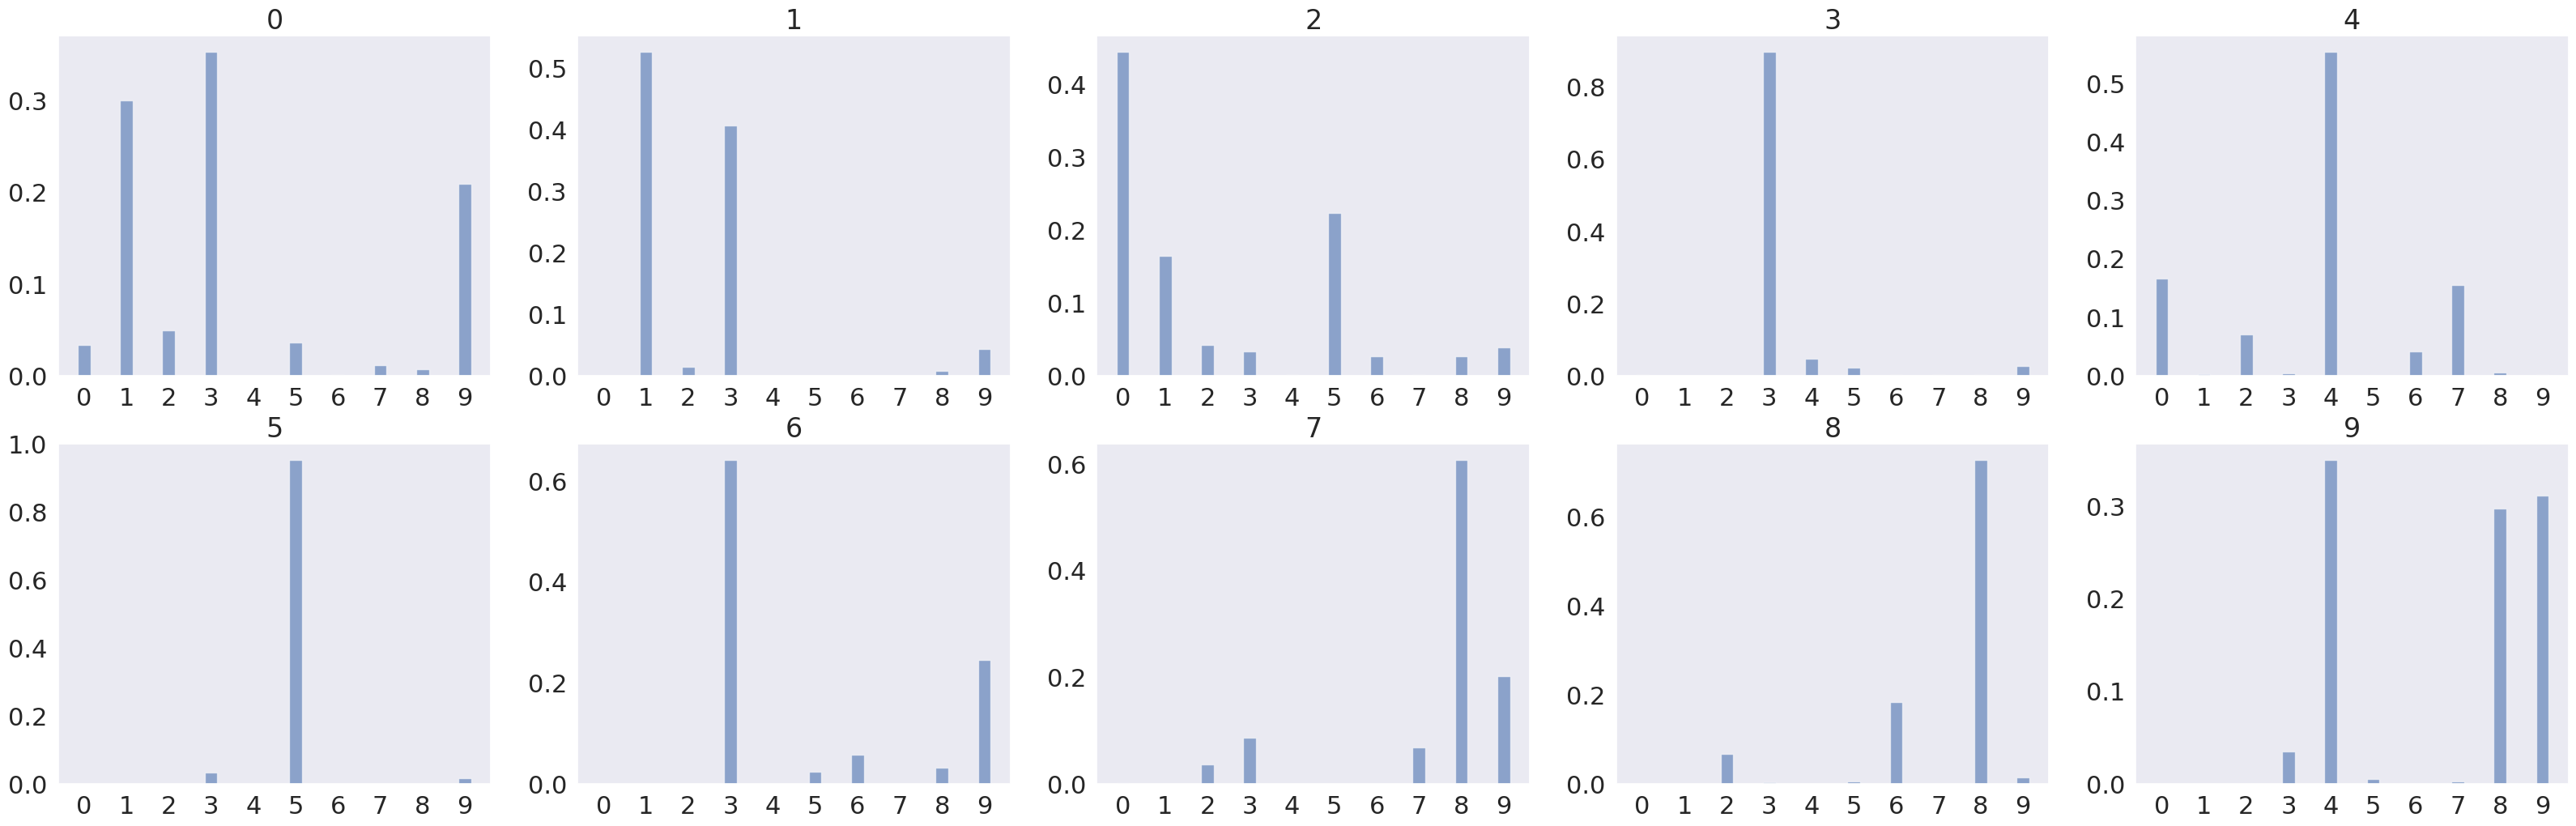

In [58]:
plt.figure( figsize = ( 40 , 12 ) )
for i in range( 10 ):
    image = Image.open(io.BytesIO(uploaded['numbers.jpg']))
    width, height = image.size
    image = image.crop( thresholds[ i ] )
    image = ImageOps.invert( image )
    image = image.resize((28,28))
    image_data = np.asarray( image , dtype = np.uint8 )
    image_data = image_data.sum( 2 ).astype( float )
    image_data /= image_data.max()
    image_data = image_data.reshape(1 , 28 , 28 , 1 )
    predictions = model.predict( image_data > 0.8 )
    plt.subplot( 2 , 5 , i + 1 )
    plt.bar( range( 10 ) , predictions[ 0 ] , 0.3 , color = "b" , alpha = 0.6 )
    plt.title( i )
    plt.grid()
    plt.xticks( range( 10 ) )

The model could predict about 50% of the numbers correctly.

In [59]:
from keras.models import Model

# we will look at just the first two (convolutional) layers of our model
layer_outputs = [layer.output for layer in model.layers[0:2]]
activation_model = Model(inputs=model.input,outputs=layer_outputs)

In [60]:
# first 4 pictures in the test set:
img = x_test[0:4].reshape(-1,28,28,1)
# with labels: 7,2,1,0
np.argmax(y_test[0:4],axis=1)

array([7, 2, 1, 0])